# Amazon Find Food Reviews: Predicting Ratings based on Reviews (An NLP Project)

## Purpose of this Project and Objectives/Potential Impact: 

## Import Necessary Packages and Dependencies

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import csv
plt.style.use('ggplot')

import requests, re
import warnings 

%pylab inline

import string, itertools
from collections import Counter, defaultdict

import spacy
import nltk
from bs4 import BeautifulSoup

%matplotlib inline 

Populating the interactive namespace from numpy and matplotlib


In [113]:
import unicodedata

nlp = spacy.load('en', parse=True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, #entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

## Direction of Analysis:

## Load Dataset

In [114]:
warnings.filterwarnings('ignore')

data = pd.read_csv('/Users/Uma/Desktop/Springboard/amazon-fine-food-reviews/Reviews.csv')


In [115]:
data.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [116]:
data.shape

(568454, 10)

In [117]:
data['Score'].size

568454

## Understand dataset features and values 


In [118]:
data.index

RangeIndex(start=0, stop=568454, step=1)

In [119]:
data.values

array([[1, 'B001E4KFG0', 'A3SGXH7AUHU8GW', ..., 1303862400,
        'Good Quality Dog Food',
        'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'],
       [2, 'B00813GRG4', 'A1D87F6ZCVE5NK', ..., 1346976000,
        'Not as Advertised',
        'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'],
       [3, 'B000LQOCH0', 'ABXLMWJIXXAIN', ..., 1219017600,
        '"Delight" says it all',
        'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful

In [120]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [121]:
list(data)

['Id',
 'ProductId',
 'UserId',
 'ProfileName',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text']

In [122]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [124]:
data['UserId'].shape

(568454,)

## Data Wrangling & Visualizations

### Dealing with Missing Data: Dropping Missing Values


In [125]:
# check missing values
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [126]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [127]:
#Clean data labeled as dc
dc = data.dropna()

In [128]:
dc.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568411.000000,568411.000000,568411.000000,568411.000000,5.684110e+05
mean,284227.440964,1.743874,2.227876,4.183309,1.296261e+09
std,164099.020907,7.636781,8.288752,1.310368,4.803792e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142114.500000,0.000000,0.000000,4.000000,1.271290e+09
50%,284224.000000,0.000000,1.000000,5.000000,1.311120e+09
75%,426341.500000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


In [129]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568411 non-null int64
ProductId                 568411 non-null object
UserId                    568411 non-null object
ProfileName               568411 non-null object
HelpfulnessNumerator      568411 non-null int64
HelpfulnessDenominator    568411 non-null int64
Score                     568411 non-null int64
Time                      568411 non-null int64
Summary                   568411 non-null object
Text                      568411 non-null object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [130]:
dc['Score'].value_counts()

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

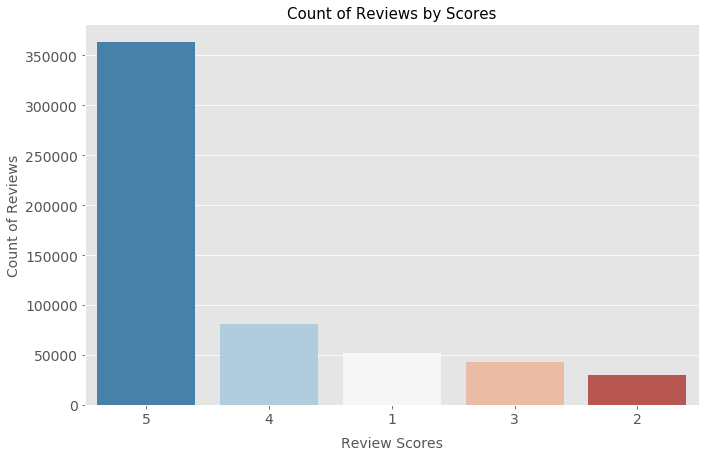

In [131]:
plt.style.use('ggplot')

plt.figure(figsize=(11,7))
grouped = dc.Score.value_counts()

sns.countplot(x='Score', data=dc, 
              order = grouped.index, palette= sns.color_palette("RdBu_r", len(grouped)))

plt.xlabel('Review Scores', fontsize=14, labelpad=10)
plt.ylabel('Count of Reviews', fontsize=14)
plt.title('Count of Reviews by Scores', fontsize=15)
plt.tick_params(labelsize=14)


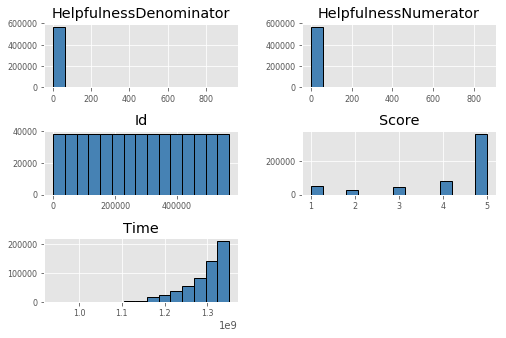

In [132]:
dc.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid= True)
plt.tight_layout(rect=(0,0, 1.2, 1.2))

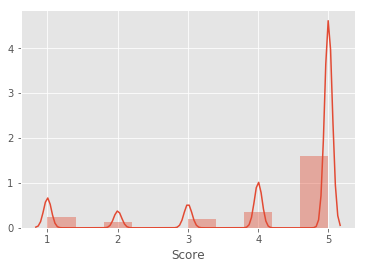

In [133]:
sns.distplot(dc['Score'],bins=10)
plt.show()

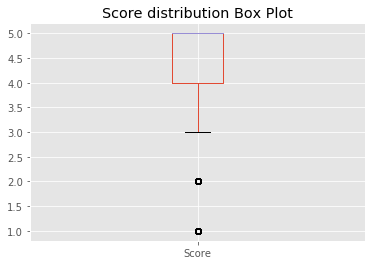

In [134]:
dc[['Score']].plot.box()
plt.title('Score distribution Box Plot')
plt.show()

In [135]:
print(dc.dtypes)

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object


In [136]:
dc['HelpfulnessRatio']=(dc['HelpfulnessNumerator']/dc['HelpfulnessDenominator'])*100

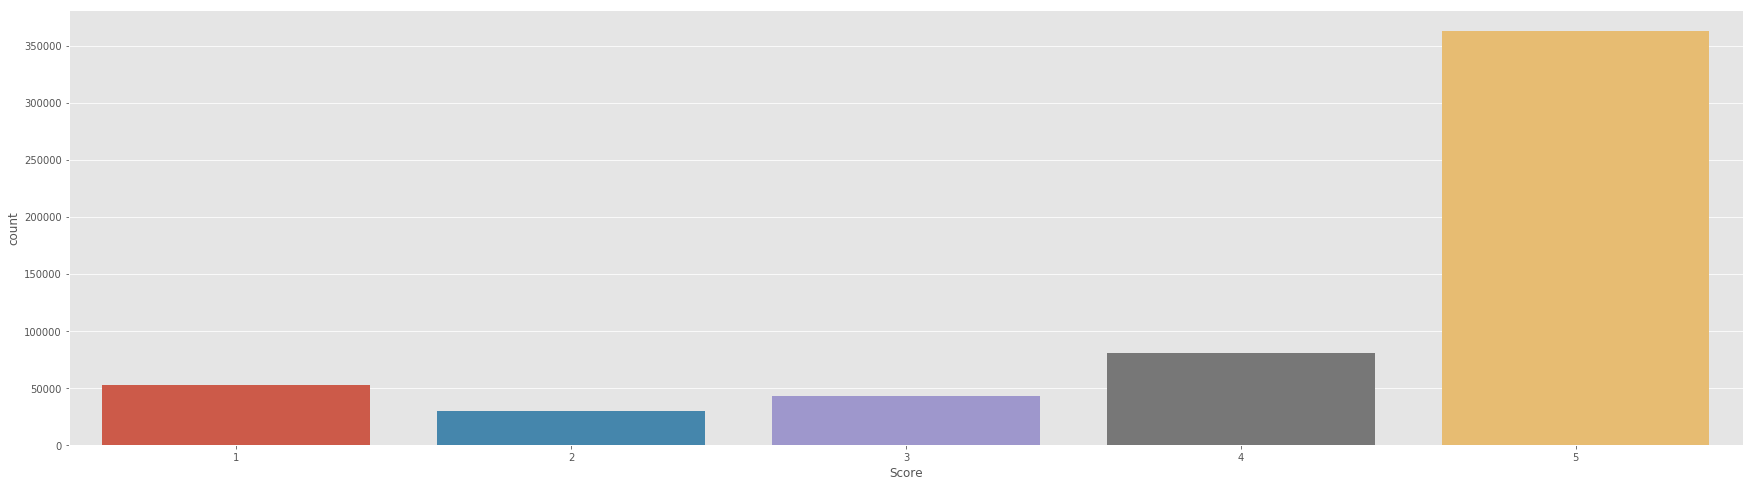

In [137]:
plt.figure(figsize=(30,8))
sns.countplot(x="Score", data=dc)
plt.show()

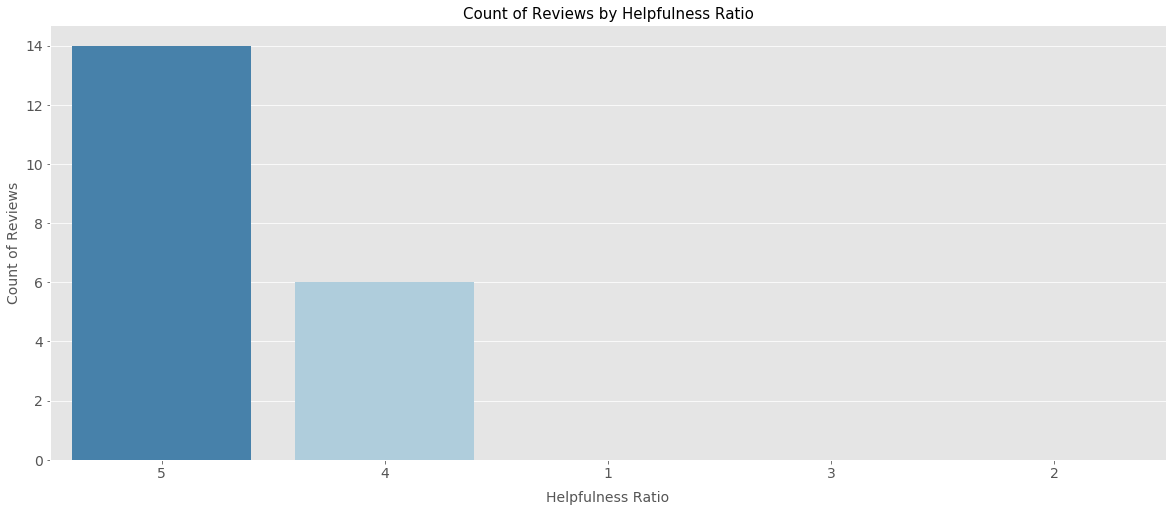

In [138]:
plt.figure(figsize=(20,8))


plt.style.use('ggplot')


sns.countplot(x="HelpfulnessRatio", data=dc, 
              order = grouped.index, palette= sns.color_palette("RdBu_r", len(grouped)))

plt.xlabel('Helpfulness Ratio', fontsize=14, labelpad=10)
plt.ylabel('Count of Reviews', fontsize=14)
plt.title('Count of Reviews by Helpfulness Ratio', fontsize=15)
plt.tick_params(labelsize=14)

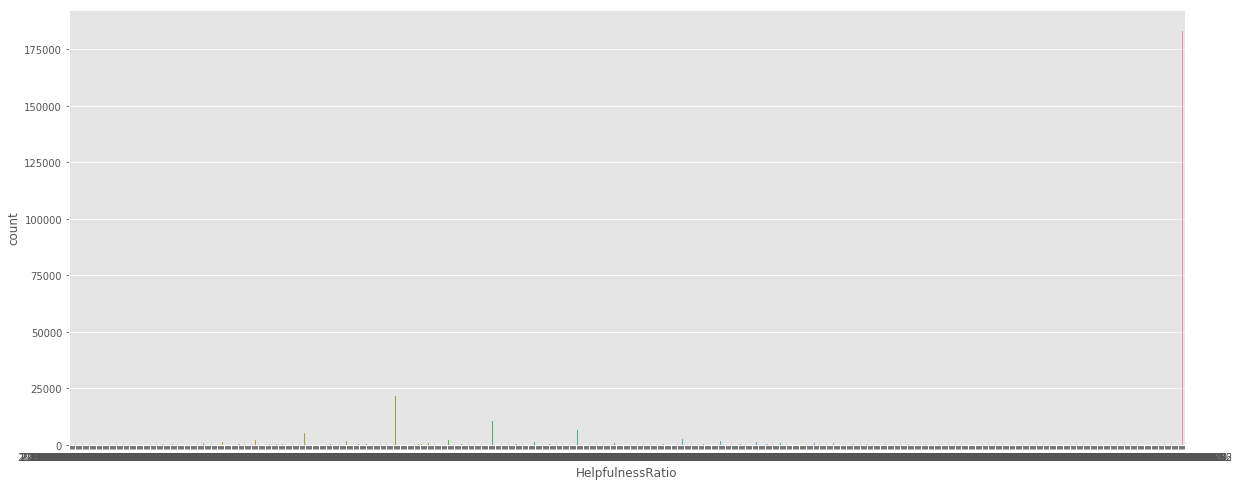

In [139]:
plt.style.use('ggplot')

plt.figure(figsize=(20,8))
sns.countplot(x="HelpfulnessRatio", data=dc)

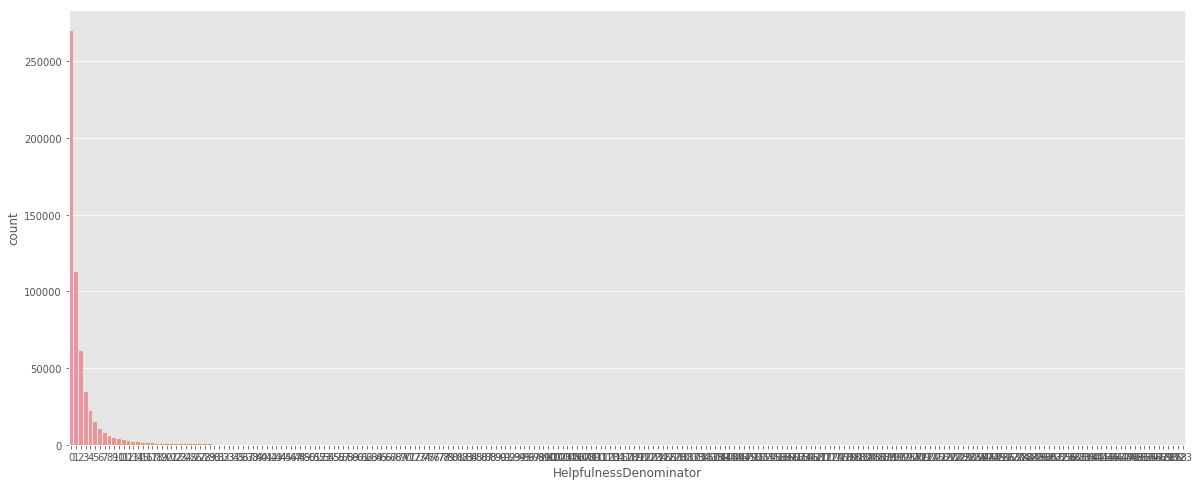

In [140]:
plt.figure(figsize=(20,8))
sns.countplot(x="HelpfulnessDenominator", data=dc)

In [141]:
Score = dc.groupby('Score').mean()
Score.corr()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Time,HelpfulnessRatio
Id,1.000000,0.006401,-0.186012,-0.649990,0.685153
HelpfulnessNumerator,0.006401,1.000000,0.976505,0.740227,-0.679431
HelpfulnessDenominator,-0.186012,0.976505,1.000000,0.862389,-0.813664
Time,-0.649990,0.740227,0.862389,1.000000,-0.990317
HelpfulnessRatio,0.685153,-0.679431,-0.813664,-0.990317,1.000000


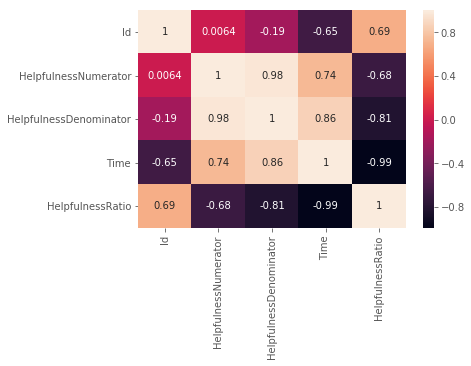

In [142]:
sns.heatmap(data=Score.corr(), annot=True)

#### The heatmap shows that the HelpfulnessNumerator and Helpfulness Denominator are highly correlated. The Helpfulness Ratio is also highly correlated with Rating. There is a negative correlation between Time and the Helpfulness Ratio and Rating. This is an interesting observation. 

In [143]:
from sklearn import datasets 
import matplotlib.pyplot as plt
plt.style
type(dc)
print(dc.keys())

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'HelpfulnessRatio'],
      dtype='object')


In [144]:
import nltk

In [145]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.cluster import KMeans



In [146]:
import spacy
import pandas as pd
import numpy as np
import nltk
import re
from bs4 import BeautifulSoup
import unicodedata
tokenizer = ToktokTokenizer()


In [147]:
import string


## Deleting Duplicates

In [148]:
#Deleting all the duplicates having the same userID, Profile, NameTime and Text all in the same column.
dc_clean =  dc.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep="first")

In [149]:
stop = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')

In [150]:
print(stop)

{'off', 'him', 'wasn', "it's", 'll', 'y', 'when', 'won', 'which', 'its', 'itself', 'in', 've', 'don', 're', 'those', "she's", 'down', 'she', 'so', 'up', 'most', "mightn't", 'o', 'once', "wouldn't", 'shouldn', 'if', 'it', 'few', 'had', 'above', 'or', 'now', "hasn't", 'an', 'her', 'doesn', "doesn't", 'of', "you've", 'who', 'such', 'mightn', 'no', "wasn't", 'should', 'a', 'yourself', 'does', 'theirs', 'any', 'into', "needn't", 'ma', 'has', 'then', 'do', 'is', 'doing', 'only', 'my', 'having', 'from', "that'll", 'been', 'am', 'because', 'can', 'weren', 'as', 'these', 'all', "shouldn't", 'at', 'didn', "you'll", 'same', 'very', 'i', 'he', 'that', 'during', 'be', "didn't", 'we', 'you', 'while', 'nor', 'with', 'each', 'for', 'were', 'the', 'here', 'haven', 'your', 'will', 'ain', 'did', 'and', 'both', 'than', 'further', 'ours', 'but', 'just', "won't", 'being', 'below', 'to', 'through', 'couldn', 'why', 'needn', 'his', 'too', 'hadn', 'them', 't', "you'd", "shan't", 'after', 'on', 'myself', 'some'

In [151]:
#Removing HTML tags
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

In [152]:
print('**********')
print(sno.stem('tasty'))

**********
tasti


In [153]:
#Removing Accented Characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

In [39]:
#Removing Special Characters
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

In [157]:
contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [158]:
text="What's the best way to ensure this?"
for word in text.split():
    if word.lower() in contractions:
        text = text.replace(word, contractions[word.lower()])
print(text)

what has / what is the best way to ensure this?


In [159]:
#Punctuation Removal
def strippunc(data):
    p = re.compile(r'[?|!|\'|"|#|.|,|)|(|\|/|~|%|*]')
    return p.sub('',data)
strippunc("fsd*?~,,,( sdfsdfdsvv)#")

'fsd sdfsdfdsvv'

In [160]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crashed yesterday , ours crash daily'

In [161]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

In [162]:
import nltk
nltk.download('stopwords')

stoplist = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to /Users/Uma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [163]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

In [167]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters    
        if special_char_removal:
            doc = remove_special_characters(doc)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [168]:
document = """<p>Héllo! Héllo! can you hear me! I just heard about <b>Python</b>!<br/>\r\n 
              It's an amazing language which can be used for Scripting, Web development,\r\n\r\n
              Information Retrieval, Natural Language Processing, Machine Learning & Artificial Intelligence!\n
              What are you waiting for? Go and get started.<br/> He's learning, she's learning, they've already\n\n
              got a headstart!</p>
           """
document

"<p>Héllo! Héllo! can you hear me! I just heard about <b>Python</b>!<br/>\r\n \n              It's an amazing language which can be used for Scripting, Web development,\r\n\r\n\n              Information Retrieval, Natural Language Processing, Machine Learning & Artificial Intelligence!\n\n              What are you waiting for? Go and get started.<br/> He's learning, she's learning, they've already\n\n\n              got a headstart!</p>\n           "

In [169]:
normalize_corpus([document], text_lemmatization=False, stopword_removal=False, text_lower_case=False)

['Hello Hello can you hear me I just heard about Python Its an amazing language which can be used for Scripting Web development Information Retrieval Natural Language Processing Machine Learning Artificial Intelligence What are you waiting for Go and get started Hes learning shes learning theyve already got a headstart ']

In [171]:
normalize_corpus([document])

['hello hello hear hear python amazing language use scripting web development information retrieval natural language processing machine learning artificial intelligence wait go get start learn learn already get headstart']

In [170]:
dc.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,100.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,100.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,100.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,NaN


In [172]:
## Dropping Neutral Scores (3)

In [173]:
#We will add a new column called “Rating”, where score above 3 is represented as a 1,we say it was positively rated. Otherwise, it’ll be represented as a 0, indicating it was negatively rated.
dc = dc[dc['Score'] != 3]
dc['Rating'] = np.where(dc['Score'] > 3, 1, 0)
dc.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,Rating
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,100.0,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,100.0,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,100.0,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,NaN,1


In [178]:
sample = dc.iloc[:30000,:]
print(sample.shape)
print(sample['Rating'].value_counts())


(30000, 12)
1    25160
0     4840
Name: Rating, dtype: int64


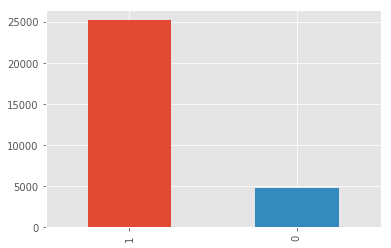

In [177]:
sample['Rating'].value_counts().plot(kind='bar')

In [176]:
#Training and Testing: 
#Splitting the data into a training and testing set using train_test_split from Sckikit-learn. 30% of the dataset will be used for testing while 70% will remain for training. 

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X_train, X_test, y_train, y_test = train_test_split(dc['Text'], dc['Rating'], random_state = 0)

In [182]:
print('X_train first entry: \n\n', X_train[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry: 

 I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


X_train shape:  (394329,)


In [183]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

ValueError: could not convert string to float: "I love this drink mix. I don't like coffee. I used to be addicted to Mtn. Dew and not the diet mtn dew. So I was drinking a lot of calories.  Now I can get my little kick of caffeine in a citrus fruity flavor and it is only 5 calories...you can't beat that!!!<br />I hope they don't get rid of this flavor. It has been hard to find so it is wonderful I can get it shipped monthly to my house....woo hoo!!!!<br />Thanks Amazon and Crystal Light."

In [100]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 12 columns):
Id                        568411 non-null int64
ProductId                 568411 non-null object
UserId                    568411 non-null object
ProfileName               568411 non-null object
HelpfulnessNumerator      568411 non-null int64
HelpfulnessDenominator    568411 non-null int64
Score                     568411 non-null int64
Time                      568411 non-null int64
Summary                   568411 non-null object
Text                      568411 non-null object
HelpfulnessRatio          298372 non-null float64
Rating                    568411 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 76.4+ MB


In [80]:
preds = nb.predict(X_test)

NotFittedError: This MultinomialNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))


NameError: name 'preds' is not defined

## Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
model = LogisticRegression()

In [72]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: "I try all of our daughter's food before I give it to her, because I refuse to feed her something that I wouldn't ever consider eating myself.  I like all of the Ella's products, however this is one of my daughter's favorites!  Like the other products mixed with baby rice (brown rice, mind you), it is thicker in its consistency and might need to be watered down with a bit of breastmilk or formula (or water) for younger babies. I definitely wouldn't start with this; I'd try one of the ones that's primarily apples, pears, mangoes, etc."

NameError: name 'preds' is not defined

In [84]:
Rating_review = dc['Text'][59]
Rating_review

'Halloween is over but, I sent a bag to my daughters class for her share. The chocolate was fresh and enjoyed by many.'

In [85]:
Rating_review_transformed = bow_transformer.transform([Rating_review])

nb.predict(Rating_review_transformed)[0]


NameError: name 'bow_transformer' is not defined

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
